In [2]:
import matplotlib.pyplot as plt


#Function definitions:
##############################################################################   
def Area3D (X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3):
    import math
    VEC1=[(X2-X1),(Y2-Y1),(Z2-Z1)]
    VEC2=[(X3-X1),(Y3-Y1),(Z3-Z1)]
    DotP=(VEC1[0]*VEC2[0])+(VEC1[1]*VEC2[1])+(VEC1[2]*VEC2[2])
    Mag1=((VEC1[0]**2)+(VEC1[1]**2)+(VEC1[2]**2))**0.5
    Mag2=((VEC2[0]**2)+(VEC2[1]**2)+(VEC2[2]**2))**0.5
    ANG=math.acos(DotP/(Mag1*Mag2))
    AR=0.5*Mag1*Mag2*math.sin(ANG)
    return AR

def dist_points(point1,point2):
    import math
    d=math.sqrt(((point2[0]-point1[0])**2)+((point2[1]-point1[1])**2)+((point2[2]-point1[2])**2))
    return d

def sign_CP(point_1,point_2,point_3): #Check sign of cross product
    V1=[point_2[0]-point_1[0],point_2[1]-point_1[1],point_2[2]-point_1[2]] #vector 1
    V2=[point_3[0]-point_1[0],point_3[1]-point_1[1],point_3[2]-point_1[2]] #vector 2
    Sign=[(V1[1]*V2[2])-(V2[1]*V1[2]),(V1[2]*V2[0])-(V2[2]*V1[0]),(V1[0]*V2[1])-(V2[0]*V1[1])] #sign of new vector
    for i in range(0,3):
        if Sign[i]!=0:Sign[i]=Sign[i]/abs(Sign[i])
    return Sign
    
def if_inside(triangle,point_coordinates): #Triangle, point_coordinates
    C1=sign_CP(triangle[0],triangle[1],point_coordinates) #Check for side 1 
    C2=sign_CP(triangle[1],triangle[2],point_coordinates) #Check for side 2
    C3=sign_CP(triangle[2],triangle[0],point_coordinates) #Check for side 3
    if C1==C2 and C2==C3: #Should be equal if point lies inside the triangle
        Res=True
    else:
        Res=False
    return Res 

def Aspect_ratio(triangle):
    import math
    A=Area3D(triangle[0][0],triangle[0][1],triangle[0][2],triangle[1][0],triangle[1][1],triangle[1][2],triangle[2][0],triangle[2][1],triangle[2][2])
    L0=dist_points(triangle[0],triangle[1])
    L1=dist_points(triangle[1],triangle[2])
    L2=dist_points(triangle[2],triangle[0])
    AR=(max(L0,L1,L2)*(L0+L1+L2))/(4*A*math.sqrt(3))
    return AR
    

def add_point(triangle_list,point_coordinates,cutoff): #List of existing triangles, point to be added
    new_triangle_list=[]
    for each in triangle_list:
        if if_inside(each,point_coordinates)==False: #add unchanged triangles
            new_triangle_list=new_triangle_list+[each]
        else: #add new triangles
            AR1=Aspect_ratio([each[0],each[1],point_coordinates])
            AR2=Aspect_ratio([each[1],each[2],point_coordinates])
            AR3=Aspect_ratio([each[2],each[0],point_coordinates])
            if max(AR1,AR2,AR3)<cutoff:
                new_triangle_list=new_triangle_list+[[each[0],each[1],point_coordinates]]
                new_triangle_list=new_triangle_list+[[each[1],each[2],point_coordinates]]
                new_triangle_list=new_triangle_list+[[each[2],each[0],point_coordinates]]
            else:
                new_triangle_list=new_triangle_list+[each]
            #+[each[2],each[0],point_coordinates]
            # new_triangle_list.append()
            # new_triangle_list.append()
    return new_triangle_list
            
            
def common_edge(triangle_1,triangle_2): #check for common edge
    n_common=0
    for each in triangle_1:
        for every in triangle_2:
            if each==every:n_common+=1
    if n_common==2:
        Res=True
    else: Res=False
    return Res

def find_common_edge(triangle_1,triangle_2): #find common edge
    com_edge=[]
    for each in triangle_1:
        for every in triangle_2:
            if each==every:
                com_edge.append(each)
    return com_edge

def get_angle(point_1,point_2,point_3): #enclosed angle
    import math 
    V1=[point_2[0]-point_1[0],point_2[1]-point_1[1],point_2[2]-point_1[2]] #vector 1
    V2=[point_2[0]-point_3[0],point_2[1]-point_3[1],point_2[2]-point_3[2]] #vector 2
    dot_v1_v2=(V1[0]*V2[0])+(V1[1]*V2[1])+(V1[2]*V2[2]) #dot products
    mag_v1=math.sqrt((V1[0]**2)+(V1[1]**2)+(V1[2]**2)) #Magnitude v1
    mag_v2=math.sqrt((V2[0]**2)+(V2[1]**2)+(V2[2]**2)) #Magnitude v2
    Theta=180*((math.acos((dot_v1_v2)/(mag_v1*mag_v2)))/math.pi)
    if Theta>180:
        Theta=360-Theta
    return Theta

def find_norm(point_1,point_2,point_3): #Find normal to plane
    V1=[point_2[0]-point_1[0],point_2[1]-point_1[1],point_2[2]-point_1[2]] #vector 1
    V2=[point_3[0]-point_1[0],point_3[1]-point_1[1],point_3[2]-point_1[2]] #vector 2
    Norm=[(V1[1]*V2[2])-(V2[1]*V1[2]),(V1[2]*V2[0])-(V2[2]*V1[0]),(V1[0]*V2[1])-(V2[0]*V1[1])] 
    return Norm
    
def vec_angle(V1,V2): #enclosed angle b/w two vectors
    import math 
    dot_v1_v2=(V1[0]*V2[0])+(V1[1]*V2[1])+(V1[2]*V2[2]) #dot products
    mag_v1=math.sqrt((V1[0]**2)+(V1[1]**2)+(V1[2]**2)) #Magnitude v1
    mag_v2=math.sqrt((V2[0]**2)+(V2[1]**2)+(V2[2]**2)) #Magnitude v2
    Theta=180*((math.acos((dot_v1_v2)/(mag_v1*mag_v2)))/math.pi)
    if Theta>180:
        Theta=360-Theta
    return Theta
    
def swap_edges(triangle_1,triangle_2): #Swap edges for better aspect ratio
    comedge=find_common_edge(triangle_1,triangle_2) #finding common edges
    for each in triangle_1:
        if each not in comedge:
            t1_op=each
    for each in triangle_2:
        if each not in comedge:
            t2_op=each
    old_angle= get_angle(comedge[0],t1_op,comedge[1])+get_angle(comedge[0],t2_op,comedge[1]) #angle for current configuration
    if old_angle>180:
        triangle_set=[[t1_op,comedge[0],t2_op],[t1_op,comedge[1],t2_op]]
    else:
        triangle_set=[triangle_1,triangle_2]
    return triangle_set

def plane_eq(triangle): #Plane equation
    norm=find_norm(triangle[0],triangle[1],triangle[2])
    d=-(norm[0]*triangle[0][0])-(norm[1]*triangle[0][1])-(norm[2]*triangle[0][2])
    eqn=[norm[0],norm[1],norm[2],d]
    return eqn

def seed_point(master_triangle, points_list,min_mesh):
    import random
    
    mt=master_triangle
    
    plane=plane_eq(mt)
    
    xmin=min(mt[0][0],mt[1][0],mt[2][0])
    xmax=max(mt[0][0],mt[1][0],mt[2][0])
    
    ymin=min(mt[0][1],mt[1][1],mt[2][1])
    ymax=max(mt[0][1],mt[1][1],mt[2][1]) 
    
    flag=True
    
    while flag==True:
        
        flag1=True
        flag2=True
        
        sp=[random.uniform(xmin,xmax),random.uniform(ymin,ymax)]
        z=((-plane[0]*sp[0])-(-plane[1]*sp[1])-plane[3])/plane[2]
        sp.append(z)
        for each in points_list:
            if dist_points(each,sp)<min_mesh:
                flag1=False
        
        if if_inside(mt,sp)==False:
            flag2=False
        
        if flag1==True and flag2==True:
            flag=False
            
    points_list.append(sp)
    return points_list


def index_maxArea(triangle_list):
    Area=[]
    for each in triangle_list:
        A=Area3D(each[0][0],each[0][1],each[0][2],each[1][0],each[1][1],each[1][2],each[2][0],each[2][1],each[2][2])
        Area.append(A)
    index=Area.index(max(Area))
    return index
    
#Calculations
############################################################################## 
    
# print(swap_edges([[0, 30, 0], [-100, 0, 0], [0, -30, 0]], [[0, 30, 0], [100, 0, 0], [0, -30, 0]]))
    
# x=[[[0,0,0],[4,0,0],[2,3,0]],[[4,0,0],[5,3,0],[2,3,0]]]#,[2,1,0])
# x1=(find_norm([0,0,0],[42,50,200],[200,35,200]))
# print(vec_angle((x1),[1,0,0]))
# print(vec_angle((x1),[0,1,0]))
# print(vec_angle((x1),[0,0,1]))
# #print(x)

In [6]:
import meshplex
import numpy as np
import cv2
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.measure import marching_cubes
from collections import defaultdict
import math
from tqdm import tqdm 
import matplotlib.pyplot as plt
from xpinyin import Pinyin
import SimpleITK as sitk
import mcubes
from scipy.ndimage import zoom
def cal_3d_DCAR(S,V):
    tV = 4*math.pi/3*math.sqrt(S/(4*math.pi))**3
    return V/tV

def tetrahedron_volume(a, b, c, d):
    return np.abs(np.einsum('ij,ij->i', a-d, np.cross(b-d, c-d))) / 6


def transfer_data(image_path):
    img = io.imread(image_path)
    return img.astype(np.bool_)

In [7]:
import json 
with open("odds.json",'r', encoding='UTF-8') as f:
     odds_dict = json.load(f)

In [187]:
img_layer = []
file_name = '陈国其'
path = 'manual_after_processing/'
alpha = odds_dict[file_name]
num = 64
for i in tqdm(range(0, num)):
    image_path = f'{path}{file_name}/' + str(i) + '.png'
    # data_matrix = np.zeros([512,512], dtype=np.uint8)
    if os.path.exists(image_path):
        img_b = transfer_data(image_path)
        img_b_index = np.where(img_b == True)
        img_b_index = np.column_stack([img_b_index[0],img_b_index[1]])
        # idx = cv2.findContours(img_b.astype(np.uint8)*255,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
        # ss = idx[0][0].reshape(-1,2)
        zz = np.ones((img_b_index.shape[0],1))*i*odds_dict[file_name]
        ss = np.concatenate((img_b_index,zz),axis=1)
        # data_matrix[ss[:,0],ss[:,1]] = 1
        img_layer.append(ss)

100%|██████████| 64/64 [00:00<00:00, 317.40it/s]


In [184]:
verts, faces,_,_ = marching_cubes(np.array(img_layer[0:2]), 0.0)

In [193]:
for item in img_layer:
    center = np.mean(item, axis=0)
    print(center)

[249.58208125 251.93266555  16.00102407]
[252.45180251 250.46865204  19.20122888]
[256.52953422 255.571949    22.40143369]
[257.55732147 255.43038779  25.6016385 ]
[257.77647884 254.09936872  28.80184332]
[257.20859265 252.16623168  32.00204813]
[257.60254714 255.16920278  35.20225294]
[255.33152627 254.68640534  38.40245776]
[255.04121613 258.43849383  41.60266257]
[255.07971014 256.40554284  44.80286738]
[257.52153654 259.16410956  48.0030722 ]
[254.92314834 251.88219517  51.20327701]
[256.34148881 256.06579906  54.40348182]
[253.14412795 256.17998023  57.60368664]
[252.27049536 255.5053353   60.80389145]
[252.89550871 254.85309558  64.00409626]
[251.73553789 256.6704161   67.20430108]
[252.24471576 256.81831362  70.40450589]
[254.34327278 256.32444708  73.6047107 ]
[253.00595964 256.04835433  76.80491551]
[254.18906622 253.62571749  80.00512033]
[255.41375615 255.79384693  83.20532514]
[257.7314612  253.442143    86.40552995]
[257.26070678 253.05655544  89.60573477]
[257.02960978 25

In [192]:
center

array([236.27342889, 242.96251378, 160.01024066])

In [175]:
verts = verts.astype(np.int32)

In [182]:
len(verts)

1134

In [176]:
for item in verts:
    print(item)

[  0 224 242]
[  0 225 241]
[ 10 225 242]
[ 10 225 243]
[  0 224 243]
[ 10 225 244]
[  0 224 244]
[ 10 225 245]
[  0 224 245]
[ 10 225 246]
[  0 224 246]
[ 10 225 247]
[  0 224 247]
[ 10 225 248]
[  0 224 248]
[ 10 225 249]
[  0 224 249]
[ 10 225 250]
[  0 224 250]
[ 10 225 251]
[  0 224 251]
[ 10 225 252]
[  0 224 252]
[ 10 225 253]
[  0 224 253]
[ 10 225 254]
[  0 224 254]
[ 10 225 255]
[  0 224 255]
[  0 225 256]
[  0 225 241]
[  0 226 240]
[ 10 226 241]
[  0 226 242]
[  0 226 242]
[  0 226 243]
[  0 226 244]
[  0 226 245]
[  0 226 246]
[  0 226 247]
[  0 226 248]
[  0 226 249]
[  0 226 250]
[  0 226 251]
[  0 226 252]
[  0 226 253]
[  0 226 254]
[  0 226 255]
[ 10 226 256]
[  0 226 255]
[  0 225 256]
[  0 226 257]
[  0 227 240]
[ 10 227 241]
[  0 227 242]
[  0 227 253]
[ 10 227 252]
[ 10 226 253]
[ 10 226 254]
[  0 227 254]
[ 10 226 255]
[  0 227 255]
[ 10 226 256]
[  0 227 256]
[  0 227 256]
[  0 227 256]
[  0 226 257]
[ 10 226 257]
[  0 226 258]
[ 10 226 258]
[  0 227 259]
[ 10 2

In [170]:
output = np.array(img_layer[0:2])

In [147]:
from scipy.spatial import qhull

In [148]:
tri = qhull.Delaunay(output)

In [149]:
a = tri.simplices

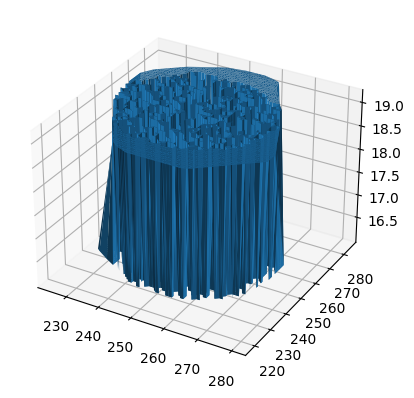

In [150]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# The triangles in parameter space determine which x, y, z points are
# connected by an edge
#ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.plot_trisurf(output[:,0], output[:,1], output[:,2], triangles=tri.simplices)


plt.show()

In [158]:
from mayavi import mlab

mlab.triangular_mesh(output[:,0], output[:,1], output[:,2],tri.simplices[:,:3])
mlab.show()

qt.qpa.window: <QNSWindow: 0x7fc0f5c97720; contentView=<QNSView: 0x7fc0f5c97000; QCocoaWindow(0x7fc0f5c96ef0, window=QWidgetWindow(0x7fc0f5c968f0, name="QMainWindowClassWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.


ValueError: The triangles array has values larger thanthe number of points

In [180]:
from mayavi import mlab

mlab.triangular_mesh([vert[0] for vert in verts],
                        [vert[1] for vert in verts],
                        [vert[2] for vert in verts],
                        faces)
mlab.show()

qt.qpa.window: <QNSWindow: 0x7fc0fb042610; contentView=<QNSView: 0x7fc0fb040740; QCocoaWindow(0x7fc0f28670e0, window=QWidgetWindow(0x7fc0f4f64900, name="QMainWindowClassWindow"))>> has active key-value observers (KVO)! These will stop working now that the window is recreated, and will result in exceptions when the observers are removed. Break in QCocoaWindow::recreateWindowIfNeeded to debug.


In [159]:
faces

array([[   2,    1,    0],
       [   4,    3,    0],
       [   0,    3,    2],
       ...,
       [1342, 1351, 1343],
       [1343, 1351, 1352],
       [1343, 1352, 1344]], dtype=int32)

In [110]:
tri.simplices.shape

(1113, 4)

In [52]:
len(tri.simplices)

105503

In [53]:
output.shape

(14661, 3)